<a href="https://www.kaggle.com/code/jayaprakash26/sparks-funds-investment-analysis?scriptVersionId=134276239" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Investment Analysis

# Objective
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

# Business and Data Understanding
Spark Funds has two minor constraints for investments:
* It wants to invest between 5 to 15 million USD per round of investment
* It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in
* For your analysis, consider a country to be English speaking only if English is one of the official languages in that country

# Business objective:
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'. (Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.)

## Checkpoints1:  Part-1

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Task 1: Data Cleaning
### Subtask 1.1: Import and read
Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.

In [2]:
rounds2 = pd.read_csv('../input/spark-funds-investment-analysis/rounds2 (1).csv')

In [3]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
rounds2.shape

(114949, 6)

In [5]:
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
rounds2['company_permalink'].unique()
rounds2['company_permalink'].nunique(dropna = True)

66373

In [7]:
#Reading compaines.csv file
companies = pd.read_csv('../input/spark-funds-investment-analysis/companies.csv')

In [8]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [9]:
companies["permalink"] = companies["permalink"].str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


### Subtask 1.2: Understanding the Dataset

* How many unique companies are present in rounds2?
* How many unique companies are present in companies?
* Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
* Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [10]:
#How many unique companies are present in companies?
companies["permalink"]= companies['permalink'].unique()
companies["permalink"].nunique(dropna =True)

66368

In [11]:
rounds2.sort_values(by=["company_permalink"], ascending=False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114948,/organization/�novatiff-reklam-ve-tan�t�m-hizm...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0
114946,/organization/�eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ôasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
...,...,...,...,...,...,...
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [12]:
companies.sort_values(by=["permalink"], ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66366,/organization/ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66365,/organization/áeron,ÁERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66362,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28-01-2014
...,...,...,...,...,...,...,...,...,...,...
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [13]:
#Are there any companies in the rounds2 file which are not present in companies?, since both are not equal, it reslted in False
rounds2["company_permalink"].equals(companies["permalink"])

False

In [14]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.
Master_frame = pd.merge(rounds2, companies, how='left', left_on='company_permalink', right_on='permalink')
Master_frame.shape

(114949, 16)

### Subtask 1.3: Cleaning the Data

* Inspecting Null Values
* Dropping unnecessary columns
* Dropping unnecessary rows

##**Cleaning the data fram for next Analysis, by removing null values**

In [15]:
#Inspecting the Null values
Master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                     40
name                          41
homepage_url                6170
category_list               3437
status                        40
country_code                8694
state_code                 10960
region                     10183
city                       10180
founded_at                 20542
dtype: int64

In [16]:
#Inspecting the Null values percentage , column-wise
round((Master_frame.isnull().sum()/len(Master_frame.index))*100, 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.03
name                        0.04
homepage_url                5.37
category_list               2.99
status                      0.03
country_code                7.56
state_code                  9.53
region                      8.86
city                        8.86
founded_at                 17.87
dtype: float64

the max null values exist in the column funding_round_code, so will be dropping that column and few other columns with null values

In [17]:
Master_frame = Master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink'], axis=1)

In [18]:
Master_frame = Master_frame.drop(['homepage_url', 'state_code', 'region', 'city', 'founded_at', 'status'], axis=1)

In [19]:
#we can see that there are columns which still have null counts, let's drop those rows and inspect the dataframe again.Master_frame = Master_frame[~(Master_frame['raised_amount_usd'].isnull())]
Master_frame = Master_frame[~(Master_frame['name'].isnull())]
Master_frame = Master_frame[~(Master_frame['category_list'].isnull())]
Master_frame = Master_frame[~(Master_frame['country_code'].isnull())]

In [20]:
round((Master_frame.isnull().sum()/len(Master_frame.index))*100, 2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     15.31
name                   0.00
category_list          0.00
country_code           0.00
dtype: float64

In [21]:
Master_frame.shape

(104517, 6)

In [22]:
Master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
5,/organization/004-technologies,venture,NaN,004 Technologies,Software,USA




# Checkpoint 2 - Funding Type Analysis

### Subtask 2.1: Retaining the rows with only four investment types.
Spark Funds wants to choose one of these four investment types(venture, angel, seed, and private equity) for each potential investment they will make. So let's observe and see how many funding types are present in master_frame and then retain the rows with above-mentioned investment types.

In [23]:
#Observing the unique funding_round_type
Master_frame['funding_round_type'].describe()

count      104517
unique         14
top       venture
freq        52024
Name: funding_round_type, dtype: object

In [24]:
Master_frame['funding_round_type'].value_counts()

venture                  52024
seed                     26431
debt_financing            6701
angel                     5417
undisclosed               3958
equity_crowdfunding       2969
private_equity            2055
grant                     1998
convertible_note          1631
post_ipo_equity            608
product_crowdfunding       351
post_ipo_debt              151
non_equity_assistance      136
secondary_market            87
Name: funding_round_type, dtype: int64

In [25]:
#Retaining the rows with only four investment types
Master_frame = Master_frame[(Master_frame['funding_round_type'] == 'venture') | (Master_frame['funding_round_type'] == 'seed') 
| (Master_frame['funding_round_type'] == 'angel') | (Master_frame['funding_round_type'] == 'private_equity')]

In [26]:
Master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
5,/organization/004-technologies,venture,NaN,004 Technologies,Software,USA


# average value invested in these funding types

In [27]:
Master_frame['raised_amount_usd'] = (Master_frame['raised_amount_usd']/1000000)
Master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,0.7,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2.0,0-6.com,Curated Web,CHN
5,/organization/004-technologies,venture,NaN,004 Technologies,Software,USA


In [28]:
#calculating average investment amount for each of the four funding types.
Master_frame.groupby('funding_round_type').raised_amount_usd.mean()

funding_round_type
angel              0.971574
private_equity    73.938486
seed               0.747950
venture           11.724223
Name: raised_amount_usd, dtype: float64

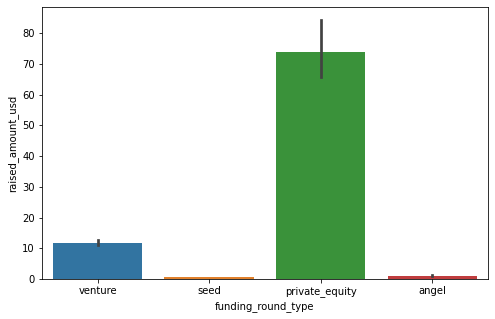

In [29]:
plt.figure(figsize=[8,5])
sns.barplot(data=Master_frame, x="funding_round_type", y="raised_amount_usd")
plt.show()

In [30]:
#Venture is the most invested type and we will choose venture since its falls within the range of our investment
Master_frame = Master_frame[Master_frame['funding_round_type'] == 'venture']

In [31]:
Master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.000000,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,CHN
5,/organization/004-technologies,venture,NaN,004 Technologies,Software,USA
8,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN


## Checkpoints 3: Country Analysis
### Subtask 3.1: Analysing the countries based on investment amount

Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [32]:
import pandas as pd

In [33]:
top9 = Master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
top9 = top9.sort_values(by = ['raised_amount_usd'], ascending = False)
top9

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
...,...
MKD,0.000000
PSE,0.000000
BHR,0.000000


In [34]:
top9 = top9.iloc[:9, ]
top9

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


In [35]:
top9['country_code']= top9.index
top9

,raised_amount_usd,country_code
country_code,,
USA,420068.029342,USA
CHN,39338.918773,CHN
GBR,20072.813004,GBR
IND,14261.508718,IND
CAN,9482.217668,CAN
FRA,7226.851352,FRA
ISR,6854.350477,ISR
DEU,6306.921981,DEU
JPN,3167.647127,JPN


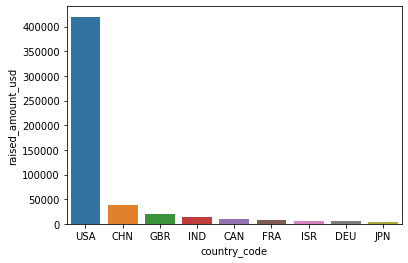

In [36]:
sns.barplot(data=top9, x="country_code", y="raised_amount_usd")
plt.show()

#with the link provided we can easily make out
* USA stands in first place as a english speaking contry
* second place by India
* 3rd place followed by United Kingdom also known as 'GBR'
https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language

In [37]:
#Retaining rows with only USA, GBR and IND country_codes.
#As SparksFunds wants to invest in only top three English speaking countries.
Master_frame = Master_frame[(Master_frame['country_code'] == 'USA') | (Master_frame['country_code'] == 'GBR') | (Master_frame['country_code'] == 'IND')]

In [38]:
Master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
5,/organization/004-technologies,venture,NaN,004 Technologies,Software,USA
10,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA


In [39]:
Master_frame.shape

(41283, 6)

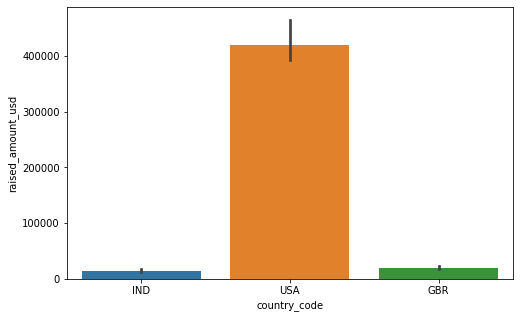

In [40]:
plt.figure(figsize=[8,5])
sns.barplot(data = Master_frame, x="country_code", y="raised_amount_usd", estimator = np.sum)
plt.show()

# Checkpoint4 - Sector Analysis 1

### Subtask 4.1: Extract the primary sector of each category
Extract the primary sector value into category_list column. According to the business rule the first string before the vertical bar will be considered the primary sector.

In [41]:
mapping = pd.read_csv('../input/spark-funds-investment-analysis/mapping.csv')

In [42]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [43]:
#Extracting the primary vector value
Master_frame['category_list'] = Master_frame['category_list'].apply(lambda x: x.split("|")[0])

In [44]:
Master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms,USA
5,/organization/004-technologies,venture,NaN,004 Technologies,Software,USA
10,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA


### Subtask 4.2: Map each primary sector to one of the eight main sectors
Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [45]:
mapping.category_list = mapping.category_list.replace({'0': 'na', '2.na':'2.0'}, regex= True)

In [46]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [47]:
mapping = pd.melt(mapping, id_vars=['category_list'], value_vars = ['Manufacturing', 'Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'])

In [48]:
mapping.head()

,category_list,variable,value
0,NaN,Manufacturing,0
1,3D,Manufacturing,1
2,3D Printing,Manufacturing,1
3,3D Technology,Manufacturing,1
4,Accounting,Manufacturing,0


In [49]:
mapping = mapping[~(mapping.value == 0)]

In [50]:
mapping.head()

,category_list,variable,value
1,3D,Manufacturing,1
2,3D Printing,Manufacturing,1
3,3D Technology,Manufacturing,1
7,Advanced Materials,Manufacturing,1
15,Agriculture,Manufacturing,1


In [51]:
mapping = mapping.drop('value', axis=1)

In [52]:
mapping.head()

,category_list,variable
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [53]:
mapping = mapping.rename(columns = {'variable': 'main_sector'})

In [54]:
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [55]:
Master_frame = Master_frame.merge(mapping, how= 'left', on = 'category_list')

In [56]:
Master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,venture,10.0,#fame,Media,IND,Entertainment
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms,USA,"News, Search and Messaging"
2,/organization/004-technologies,venture,NaN,004 Technologies,Software,USA,Others
3,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"


In [57]:
#List of primary sectors which have no main sectors in the master_frame
Master_frame[Master_frame.main_sector.isnull()].category_list.unique()

array(['Nanotechnology', 'Natural Gas Uses',
       'Natural Language Processing', 'Enterprise 2.0',
       'Adaptive Equipment', 'Racing', 'Specialty Retail',
       'Biotechnology and Semiconductor', 'Rapidly Expanding',
       'Navigation', 'Product Search', 'GreenTech', 'Retirement'],
      dtype=object)

In [58]:
#Number of rows with NaN main_sector value
len(Master_frame[Master_frame.main_sector.isnull()])

174

In [59]:
#Retaining the rows which have main_sector values
Master_frame = Master_frame[~(Master_frame.main_sector.isnull())]
len(Master_frame.index)

41109

In [60]:
Master_frame.shape

(41109, 7)

In [61]:
Master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,venture,10.0,#fame,Media,IND,Entertainment
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms,USA,"News, Search and Messaging"
2,/organization/004-technologies,venture,NaN,004 Technologies,Software,USA,Others
3,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"


# Checkpoint 5: Sector Analysis 2

# Task 5: Sector Analysis 2¶
# ### Subtask 5.1: Create DataFrames D1, D2, D3 based on three countries

* Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:
* All the columns of the master_frame along with the primary sector and the main sector
* The total number (or count) of investments for each main sector in a separate column
* The total amount invested in each main sector in a separate column

In [62]:
D1 = Master_frame[(Master_frame['country_code'] == 'USA') & (Master_frame['raised_amount_usd']>=5) & (Master_frame['raised_amount_usd']<=15)]

In [63]:
D1

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector
5,/organization/0xdata,venture,8.900000,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,venture,5.000000,1 Mainstream,Apps,USA,"News, Search and Messaging"
21,/organization/128-technology,venture,11.999347,128 Technology,Service Providers,USA,Others
24,/organization/1366-technologies,venture,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing
25,/organization/1366-technologies,venture,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing
...,...,...,...,...,...,...,...
41271,/organization/zynga,venture,15.000000,Zynga,Facebook Applications,USA,"Social, Finance, Analytics, Advertising"
41274,/organization/zynga,venture,5.026000,Zynga,Facebook Applications,USA,"Social, Finance, Analytics, Advertising"
41278,/organization/zyomyx-inc,venture,12.000000,ZYOMYX,Biotechnology,USA,Cleantech / Semiconductors
41279,/organization/zyomyx-inc,venture,14.219999,ZYOMYX,Biotechnology,USA,Cleantech / Semiconductors


In [64]:
D12 = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count']).rename(columns = {'sum':'Total_amount','count': 'Total_count'})

In [65]:
D1 = D1.merge(D12, how='left', on='main_sector')

In [66]:
D1.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/0xdata,venture,8.900000,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising",23807.376964,2714
1,/organization/1-mainstream,venture,5.000000,1 Mainstream,Apps,USA,"News, Search and Messaging",13959.567428,1582
2,/organization/128-technology,venture,11.999347,128 Technology,Service Providers,USA,Others,26321.007002,2950
3,/organization/1366-technologies,venture,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799
4,/organization/1366-technologies,venture,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799


In [67]:
D1['count']= D1.iloc[:,-1:]
D1

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)",count
0,/organization/0xdata,venture,8.900000,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising",23807.376964,2714,2714
1,/organization/1-mainstream,venture,5.000000,1 Mainstream,Apps,USA,"News, Search and Messaging",13959.567428,1582,1582
2,/organization/128-technology,venture,11.999347,128 Technology,Service Providers,USA,Others,26321.007002,2950,2950
3,/organization/1366-technologies,venture,15.000000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799,799
4,/organization/1366-technologies,venture,5.000000,1366 Technologies,Manufacturing,USA,Manufacturing,7258.553378,799,799
...,...,...,...,...,...,...,...,...,...,...
12007,/organization/zynga,venture,15.000000,Zynga,Facebook Applications,USA,"Social, Finance, Analytics, Advertising",23807.376964,2714,2714
12008,/organization/zynga,venture,5.026000,Zynga,Facebook Applications,USA,"Social, Finance, Analytics, Advertising",23807.376964,2714,2714
12009,/organization/zyomyx-inc,venture,12.000000,ZYOMYX,Biotechnology,USA,Cleantech / Semiconductors,21206.628192,2300,2300
12010,/organization/zyomyx-inc,venture,14.219999,ZYOMYX,Biotechnology,USA,Cleantech / Semiconductors,21206.628192,2300,2300


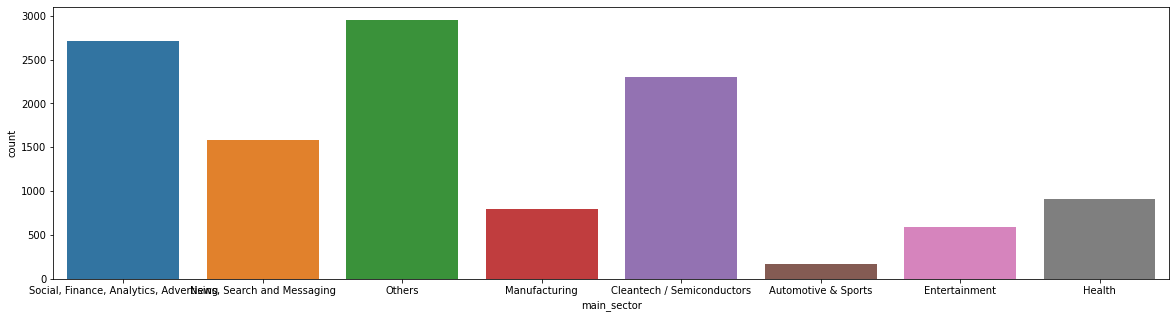

In [68]:
plt.figure(figsize=[20,5])
sns.barplot(data = D1, x='main_sector', y='count', estimator = np.max)
plt.show()

In [69]:
D2 = Master_frame[(Master_frame['country_code'] == 'GBR') & (Master_frame['raised_amount_usd']>=5) & (Master_frame['raised_amount_usd']<=15)]

In [70]:
D21 = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count']).rename(columns = {'sum':'Total_amount','count': 'Total_count'})

In [71]:
D2 = D2.merge(D21, how='left', on='main_sector')

In [72]:
D2.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/365scores,venture,5.500000,365Scores,Android,GBR,"Social, Finance, Analytics, Advertising",1089.404014,133
1,/organization/7digital,venture,8.468328,7digital,Content Creators,GBR,Entertainment,482.784687,56
2,/organization/7digital,venture,10.000000,7digital,Content Creators,GBR,Entertainment,482.784687,56
3,/organization/90min,venture,15.000000,90min,Media,GBR,Entertainment,482.784687,56
4,/organization/90min,venture,5.800000,90min,Media,GBR,Entertainment,482.784687,56


In [73]:
D2['count']= D2.iloc[:,-1:]
D2

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)",count
0,/organization/365scores,venture,5.500000,365Scores,Android,GBR,"Social, Finance, Analytics, Advertising",1089.404014,133,133
1,/organization/7digital,venture,8.468328,7digital,Content Creators,GBR,Entertainment,482.784687,56,56
2,/organization/7digital,venture,10.000000,7digital,Content Creators,GBR,Entertainment,482.784687,56,56
3,/organization/90min,venture,15.000000,90min,Media,GBR,Entertainment,482.784687,56,56
4,/organization/90min,venture,5.800000,90min,Media,GBR,Entertainment,482.784687,56,56
...,...,...,...,...,...,...,...,...,...,...
614,/organization/zoopla,venture,5.440000,Zoopla,Property Management,GBR,"Social, Finance, Analytics, Advertising",1089.404014,133,133
615,/organization/zopa,venture,12.900000,Zopa,Finance,GBR,"Social, Finance, Analytics, Advertising",1089.404014,133,133
616,/organization/zopa,venture,15.000000,Zopa,Finance,GBR,"Social, Finance, Analytics, Advertising",1089.404014,133,133
617,/organization/zopa,venture,5.000000,Zopa,Finance,GBR,"Social, Finance, Analytics, Advertising",1089.404014,133,133


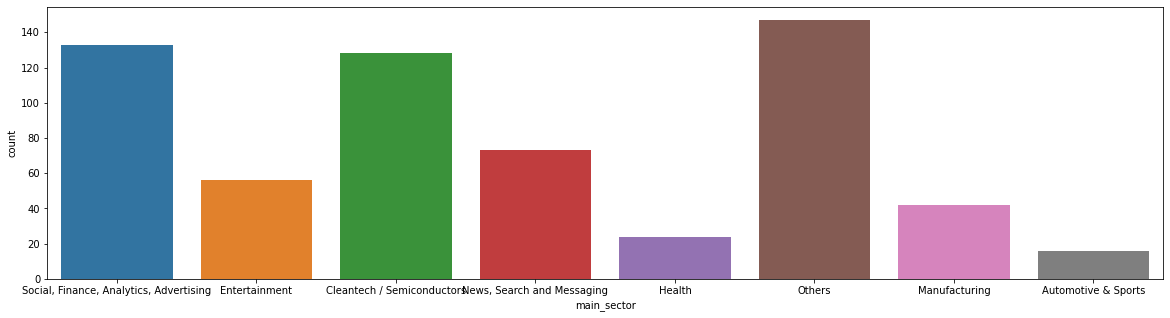

In [74]:
plt.figure(figsize=[20,5])
sns.barplot(data = D2, x= 'main_sector', y='count', estimator = np.max)
plt.show()

In [75]:
D3 = Master_frame[(Master_frame['country_code'] == 'IND') & (Master_frame['raised_amount_usd']>=5) & (Master_frame['raised_amount_usd']<=15)]

In [76]:
D31 = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count']).rename(columns = {'sum':'Total_amount','count': 'Total_count'})

In [77]:
D3 = D3.merge(D31, how='left', on='main_sector')

In [78]:
D3.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/-fame,venture,10.000000,#fame,Media,IND,Entertainment,280.830000,33
1,/organization/21diamonds-india,venture,6.369507,21Diamonds,E-Commerce,IND,Others,1013.409507,110
2,/organization/a-little-world,venture,6.410000,A LITTLE WORLD,Finance,IND,"Social, Finance, Analytics, Advertising",550.549550,60
3,/organization/adlabs-imagica,venture,8.180000,Adlabs Imagica,Entertainment,IND,Entertainment,280.830000,33
4,/organization/agile,venture,5.740000,Agile,Finance,IND,"Social, Finance, Analytics, Advertising",550.549550,60


In [79]:
D3['count']= D3.iloc[:,-1:]
D3

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)",count
0,/organization/-fame,venture,10.000000,#fame,Media,IND,Entertainment,280.830000,33,33
1,/organization/21diamonds-india,venture,6.369507,21Diamonds,E-Commerce,IND,Others,1013.409507,110,110
2,/organization/a-little-world,venture,6.410000,A LITTLE WORLD,Finance,IND,"Social, Finance, Analytics, Advertising",550.549550,60,60
3,/organization/adlabs-imagica,venture,8.180000,Adlabs Imagica,Entertainment,IND,Entertainment,280.830000,33,33
4,/organization/agile,venture,5.740000,Agile,Finance,IND,"Social, Finance, Analytics, Advertising",550.549550,60,60
...,...,...,...,...,...,...,...,...,...,...
323,/organization/zomato,venture,10.000000,Zomato,Content Discovery,IND,Entertainment,280.830000,33,33
324,/organization/zoomcar-india,venture,8.000000,ZoomCar,Automotive,IND,Automotive & Sports,136.900000,13,13
325,/organization/zoomcar-india,venture,11.000000,ZoomCar,Automotive,IND,Automotive & Sports,136.900000,13,13
326,/organization/zoomo,venture,5.000000,Zoomo,Internet,IND,"News, Search and Messaging",433.834545,52,52


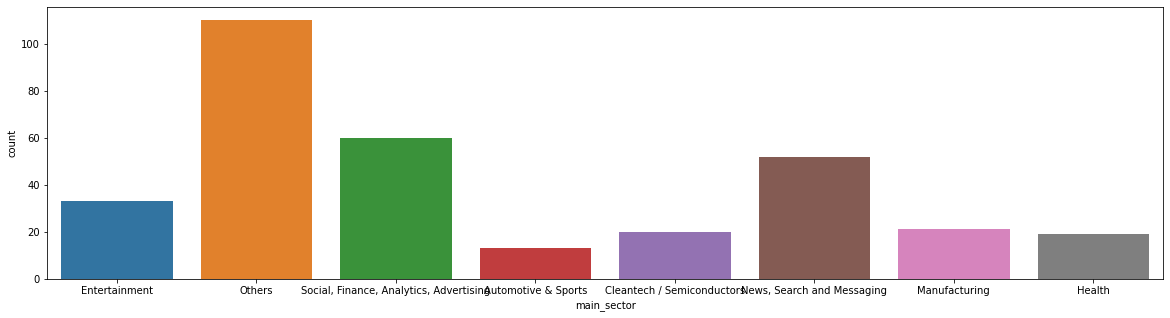

In [80]:
plt.figure(figsize=[20,5])
sns.barplot(data = D3, x= 'main_sector', y='count', estimator = np.max)
plt.show()

In [81]:
#NUmber of Investments(Counts)
round(D1.raised_amount_usd.count(), 2)
round(D2.raised_amount_usd.count(), 2)
round(D3.raised_amount_usd.count(), 2)

328

In [82]:
#Total amount investment
round(D1.raised_amount_usd.sum(), 2)
round(D2.raised_amount_usd.sum(), 2)
round(D3.raised_amount_usd.sum(), 2)

2949.54

In [83]:
D12

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                           1454.104361         167
Cleantech / Semiconductors                   21206.628192        2300
Entertainment                                 5099.197982         591
Health                                        8211.859357         909
Manufacturing                                 7258.553378         799
News, Search and Messaging                   13959.567428        1582
Others                                       26321.007002        2950
Social, Finance, Analytics, Advertising      23807.376964        2714

In [84]:
D21

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            167.051565          16
Cleantech / Semiconductors                    1150.139665         128
Entertainment                                  482.784687          56
Health                                         214.537510          24
Manufacturing                                  361.940335          42
News, Search and Messaging                     615.746235          73
Others                                        1283.624289         147
Social, Finance, Analytics, Advertising       1089.404014         133

In [85]:
D31

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            136.900000          13
Cleantech / Semiconductors                     165.380000          20
Entertainment                                  280.830000          33
Health                                         167.740000          19
Manufacturing                                  200.900000          21
News, Search and Messaging                     433.834545          52
Others                                        1013.409507         110
Social, Finance, Analytics, Advertising        550.549550          60

In [86]:
#For the top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Others']

In [87]:
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')

In [88]:
company = company.sort_values(by = 'raised_amount_usd', ascending=False).head()

In [89]:
print(company.head())

                                   raised_amount_usd
company_permalink                                   
/organization/virtustream                  64.300000
/organization/capella                      54.968051
/organization/airtight-networks            54.201907
/organization/decarta                      52.100000
/organization/black-duck-software          51.000000


In [90]:
#For the second top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending=False).head()

In [91]:
print(company.head())

                           raised_amount_usd
company_permalink                           
/organization/shotspotter          67.933006
/organization/demandbase           63.000000
/organization/intacct              61.800000
/organization/netbase              60.600000
/organization/lotame               59.700000


In [92]:
#For the top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending=False).head()
print(company.head())

                                       raised_amount_usd
company_permalink                                       
/organization/electric-cloud                   37.000000
/organization/sensage                          36.250000
/organization/enigmatic                        32.500000
/organization/silverrail-technologies          29.000000
/organization/opencloud                        27.972766


In [93]:
#For the second top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending=False).head()
print(company.head())

                                     raised_amount_usd
company_permalink                                     
/organization/celltick-technologies          37.500000
/organization/mythings                       34.000000
/organization/zopa                           32.900000
/organization/imagini                        28.550000
/organization/marketinvoice                  25.553007


In [94]:
#For the top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending=False).head()
print(company.head())

                                raised_amount_usd
company_permalink                                
/organization/firstcry-com                   39.0
/organization/myntra                         38.0
/organization/commonfloor                    32.9
/organization/pepperfry-com                  28.0
/organization/itzcash-card-ltd               25.0


In [95]:
#For the second top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending=False).head()
print(company.head())

                                          raised_amount_usd
company_permalink                                          
/organization/manthan-systems                      50.70000
/organization/komli-media                          28.00000
/organization/shopclues-com                        25.00000
/organization/intarvo                              21.90000
/organization/grameen-financial-services           21.55605


# Result:
#### Based on the data analysis performed, SparksFunds should invest in -

* Funding type - Venture.
* Countries - USA, Britain and India
* Top two sectors to invest in are - Others and Social, Finance, Analytics, Advertising